# Neutrino Oscillations

### Importing necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cns
import scipy.linalg as sclin

### Defining necessary functions

In [3]:
def normalize_rho(rho):
    tr=np.trace(rho)
    return rho/tr

## Parameters for Neutrino Oscillations

In [4]:
N=3 #number of flavors
E= 1e9 #eV This is the total energy of neutrino

### Mixing angles, masses

In [5]:
theta12=0.5*np.arcsin(np.sqrt(0.861)) # Coupling angles
theta23=0.5*np.arcsin(np.sqrt(0.97))
theta13=0.5*np.arcsin(np.sqrt(0.10))
deltaCP=0#np.radians(197) # Phase due to CP symmetry violation


""" Difference between the squares of the three masses. Note that only the difference matters and not the actual masses. """
delm12sq=0.759e-4 #eV^2
delm32sq=23.2e-4 #eV^2
delm13sq=23.2e-4 #eV^2

"""For intuition, I will be assuming small masses, the exact values of which have no relevance for this problem."""
m1=0 #eV
m2=np.sqrt(m1**2+delm12sq)
m3=np.sqrt(m1**2+delm13sq)

masses=np.array([m1, m2, m3])

## Definitions

### Defining the PMNS matrix '$U$'

In [6]:
def rot2D(q):
    return np.array([[np.cos(q), np.sin(q)], [-np.sin(q), np.cos(q)]])
U=np.identity(3, dtype=np.complex128)
angles=[theta23, theta13, theta12]
for i in range(N):
    Ui=np.zeros([N,N], dtype=np.complex128)
    Ui[i,i]=1
    for j in range(1,N):
        for k in range(1,N):
            Ui[(i+j)%N, (i+k)%N]=rot2D(angles[i])[j-1,k-1]
    if i==1:
        Ui[2,0]*=np.exp(1j*deltaCP)
        Ui[0,2]*=np.exp(-1j*deltaCP)
    U=np.matmul(U, Ui)

Uinv=np.linalg.inv(U)

### Defining the initial state 

In [14]:
rho_0_flavor=np.array([[1,0,0], [0,0,0], [0,0,0]])
rho_0_flavor=normalize_rho(rho_0_flavor)
rho_0_mass=normalize_rho(np.matmul(np.matmul(Uinv, rho_0_flavor), U))

### Defining the matrix of transition frequencies

In [15]:
T=np.zeros([N, N])
for i in range(N):
    for j in range(N):
        T[i,j]=(masses[i]**2-masses[j]**2)/(2*E)

## Time Evolution

### Defining the time range

In [26]:
tmin=0
tmax=1.2e-1#s
tpts=5000
ts=np.linspace(tmin, tmax, tpts)
c=cns.elementary_charge/cns.hbar

### Applying dynamics

In [27]:
rho_mass=np.zeros([N, N, tpts], dtype=np.complex128)
rho_flavor=np.zeros([N, N, tpts], dtype=np.complex128)
von_Neumann_entropy=np.zeros([tpts], dtype=np.complex128)
for n in range(tpts):
    for i in range(N):
        for j in range(N):
            rho_mass[i, j, n]=rho_0_mass[i,j]*np.exp(-1j*c*ts[n]*T[i,j])
    rho_flavor[:,:,n]=np.matmul(np.matmul(U, rho_mass[:,:,n]), Uinv)
    #von_Neumann_entropy[n]=-np.trace(np.matmul(rho_flavor[:,:,n], sclin.logm(rho_flavor[:,:,n])/np.log(2)))

## Results

c:\Users\soura\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


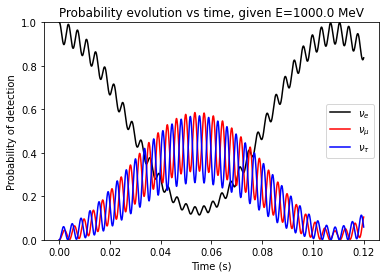

In [28]:
LE=(ts*cns.speed_of_light/1e3)/(E/1e9)
flavors=[r'$\nu_e$', r'$\nu_{\mu}$', r'$\nu_{\tau}$']
colors=['k', 'r', 'b']
for i in range(N):
    plt.plot(ts, rho_flavor[i,i,:], label=flavors[i], c=colors[i])
plt.xlabel('Time (s)')
plt.ylabel('Probability of detection')
plt.ylim(0, 1)
plt.legend()
plt.title('Probability evolution vs time, given E={} MeV'.format(E/10**6))
plt.savefig('time_evol.png', dpi=400)

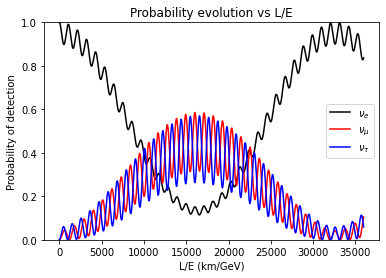

In [29]:
for i in range(N):
    plt.plot(LE, rho_flavor[i,i,:], label=flavors[i], c=colors[i])
plt.xlabel('L/E (km/GeV)')
plt.ylabel('Probability of detection')
plt.ylim(0, 1)
plt.legend()
plt.title('Probability evolution vs L/E')
plt.savefig('neutrino_oscillation_from_{:.2f}_{:.2f}_{:.2f}.png'.format(rho_0_flavor[0,0], rho_0_flavor[1,1], rho_0_flavor[2,2]), dpi=300)

(0.0, 2000.0)

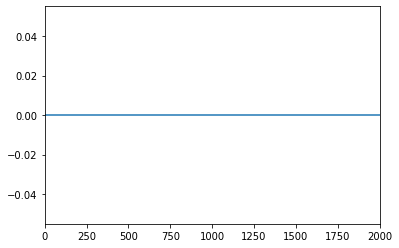

In [30]:
plt.plot(LE, von_Neumann_entropy)
plt.xlim(0,2000)